In [1]:
'''
This project is about predicting the saleprice of a house based on several 
features such as location, yearbuilt and overall quality of the house but 
to mention a few. The target variable is saleprice

This model will be using advanced regression techniques to try and estimate 
the price as accurately as possible

The model is evaluated by the cross validation score which needs to be as low as
possible

The ideal model would get a score of 0.0000

The data consists of train and test sets
The train set is what we will be using to train our model - it contains all the independent 
variables and the dependent variable(saleprice)
The test set does not have saleprice. The objective of your model is to accurately predict 
the saleprice based on the data provided in the test set
'''

'\nThis project is about predicting the saleprice of a house based on several \nfeatures such as location, yearbuilt and overall quality of the house but \nto mention a few. The target variable is saleprice\n\nThis model will be using advanced regression techniques to try and estimate \nthe price as accurately as possible\n\nThe model is evaluated by the cross validation score which needs to be as low as\npossible\n\nThe ideal model would get a score of 0.0000\n\nThe data consists of train and test sets\nThe train set is what we will be using to train our model - it contains all the independent \nvariables and the dependent variable(saleprice)\nThe test set does not have saleprice. The objective of your model is to accurately predict \nthe saleprice based on the data provided in the test set\n'

In [ ]:
'''
In this model we are visualising our variables in order to get more insight
and produce a better model
'''

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn import li
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_validate, cross_val_score, KFold

In [3]:
df_train = pd.read_csv("C:/Users/Asus/jypNotebooks/housing predictions/data/train.csv", engine='python')
df_test = pd.read_csv("C:/Users/Asus/jypNotebooks/housing predictions/data/test.csv", engine='python')

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df_train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [6]:
df_train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


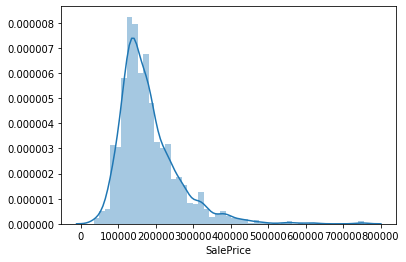

In [8]:
#plot histogram
sns.distplot(df_train['SalePrice'])

In [ ]:
'''
Purpose of knowing skewness and kurtosis is for the purpose of
normalization.
Skewness needs to be eliminated in order to have a well genereralized model
'''

In [9]:
print("Skewness: %f"% df_train['SalePrice'].skew())
print("Kurtosis: %f"% df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
'''
Finding correlations between variables
'''

In [10]:
corr = df_train['SalePrice'].corr(df_train['OverallQual'])
print(corr)
corr1 = df_train['SalePrice'].corr(df_train['GrLivArea'])
print(corr1)
corr1 = df_train['SalePrice'].corr(df_train['BsmtFinSF2'])
print(corr1)



0.7909816005838048
0.7086244776126522
-0.011378121450215136


In [11]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
def plotscatter(xvarstring, yvarstring):
    '''
    fun to plot scatter plots
    xvarstring = the name of the x axis df column
    yvarstring = the name of the y axis df column
    '''
    df_xcolumn = df_train[xvarstring]
    df_ycolumn = df_train[yvarstring]
    data = pd.concat([df_ycolumn, df_xcolumn], axis=1)
    data.plot.scatter(x = xvarstring, y=yvarstring, ylim=(0, 800000))

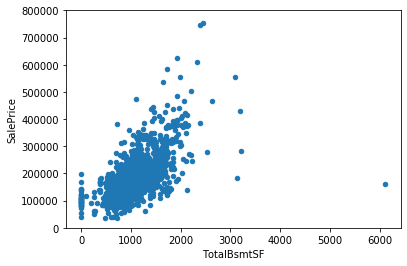

In [13]:
plotscatter('TotalBsmtSF', 'SalePrice')

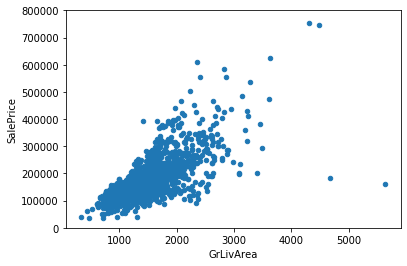

In [14]:
plotscatter('GrLivArea','SalePrice')

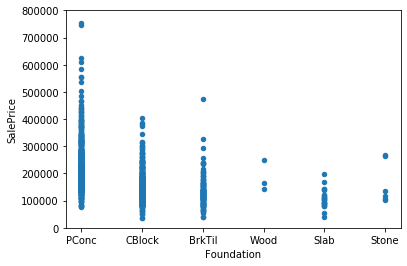

In [15]:
plotscatter('Foundation','SalePrice')

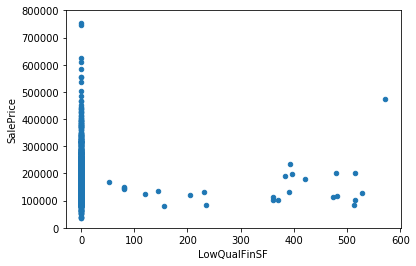

In [16]:
plotscatter('LowQualFinSF','SalePrice')

In [17]:
def boxplots(xvarstring, yvarstring):
    """
    fun to plot boxplots
    """
    
    df_xcolumn = df_train[xvarstring]
    df_ycolumn = df_train[yvarstring]
    data = pd.concat([df_ycolumn, df_xcolumn], axis=1)
    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=xvarstring, y=yvarstring, data=data)

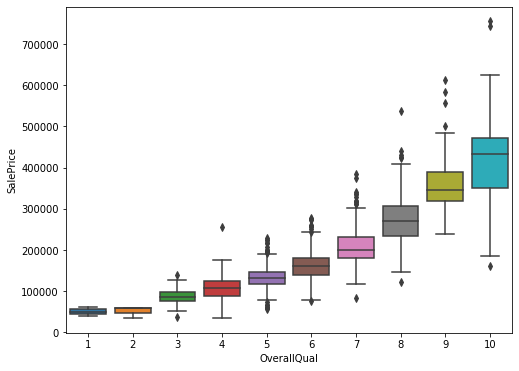

In [18]:
boxplots('OverallQual','SalePrice')

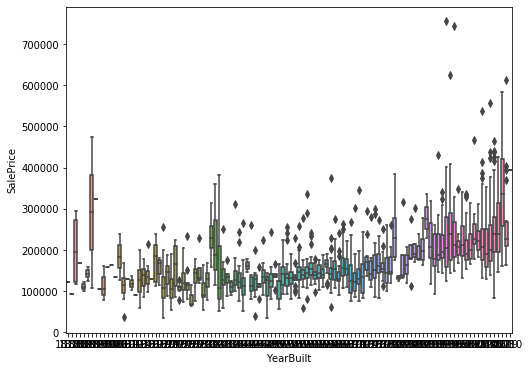

In [19]:
boxplots('YearBuilt', 'SalePrice')

In [ ]:
'''
A heatmap is used to show the correlation between variables.
Independent variables(all the other variables apart from saleprice) can
be eliminated if some of them are highly correlated with each other to reduce the 
feature space(no of features) and improve the performance of the model

This comes with a trade-off because one may elimanate a feature that might hv 
helped the model to have more accurate predictions
'''

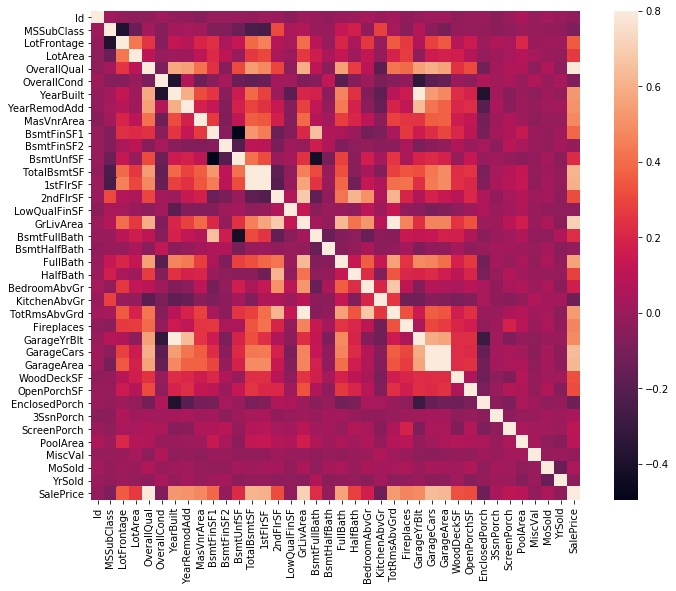

In [20]:
corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix, vmax = .8, square=True)

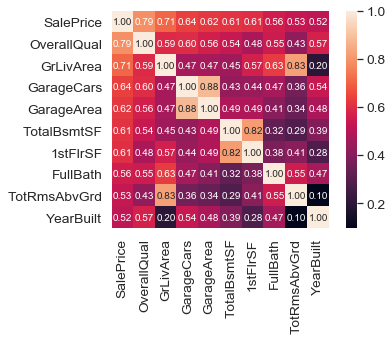

In [21]:
k = 10 #no of vars for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
"""
Notes on Heatmap
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly
 correlated with 'SalePrice'.
 GarageCars' and 'GarageArea' are also
 some of the most strongly correlated variables.
 We will pick one-> GarageCars because its corr with saleprice
 is higher
 'TotalBsmtSF'and '1stFloor' choose either
 'TotRmsAbvGrd' and 'GrLivArea' choose either
"""

"\nNotes on Heatmap\n'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly\n correlated with 'SalePrice'.\n GarageCars' and 'GarageArea' are also\n some of the most strongly correlated variables.\n We will pick one-> GarageCars because its corr with saleprice\n is higher\n 'TotalBsmtSF'and '1stFloor' choose either\n 'TotRmsAbvGrd' and 'GrLivArea' choose either\n"

In [ ]:
'''
A pairwise plot to see the relationship between different variables
'''

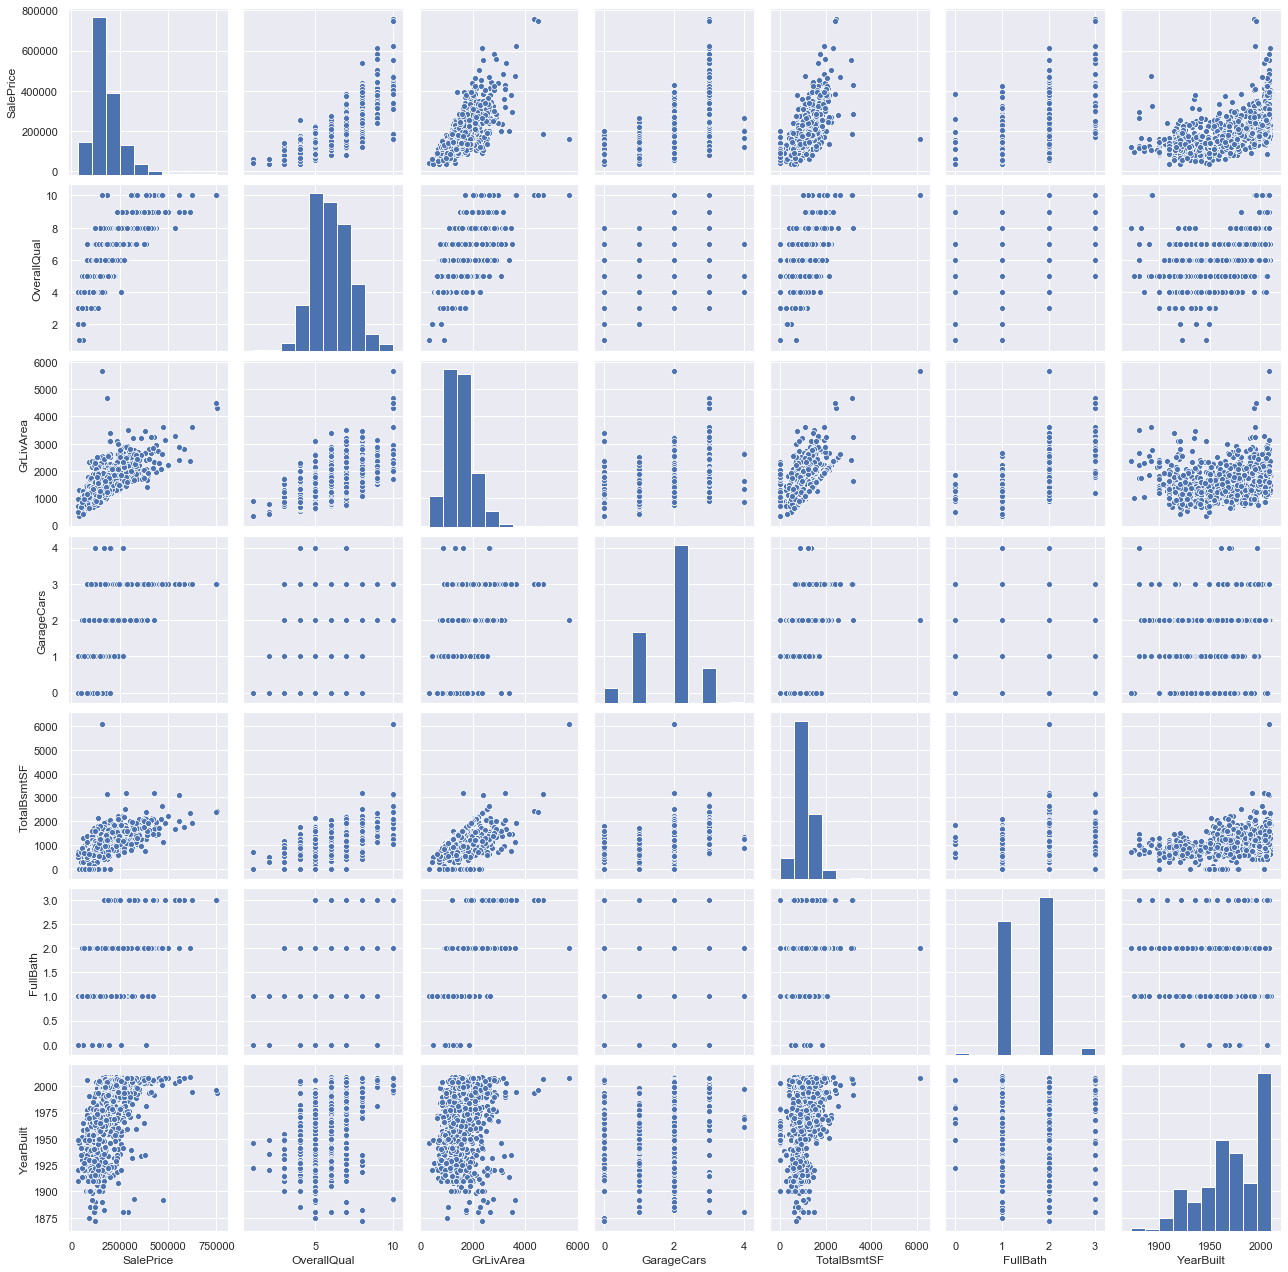

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

In [24]:
# x = df_train['YearBuilt']
# y = df_train['SalePrice']
# fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
# plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(0,800000)
# # plt.title('Air Passengers (Two Side View)', fontsize=16)
# # plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
# plt.show()

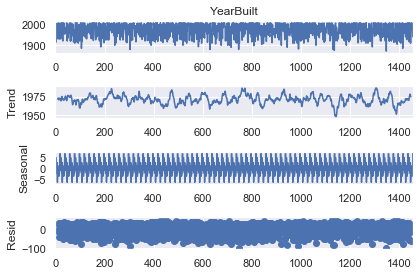

In [25]:
#performing time series analysis for yearbuilt and salesprice

yrbuilt = df_train['YearBuilt']
saleprice = df_train['SalePrice']
resulta = seasonal_decompose(yrbuilt, model='additive', period=20)
resulta.plot()
plt.show()

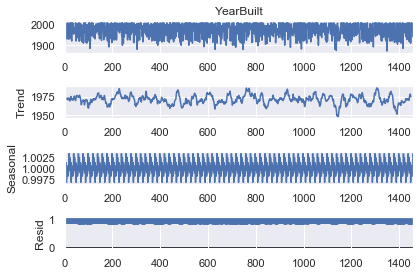

In [26]:
resultm = seasonal_decompose(yrbuilt, model='multiplicative', period=20)
resultm.plot()
plt.show()

In [27]:
'''Notes on time series analysis
The trend shows seasonal behaviour which repeats
after every few years/months
I am not sure about this
'''

'Notes on time series analysis\nThe trend shows seasonal behaviour which repeats\nafter every few years/months\nI am not sure about this\n'

In [28]:
'''Handling missing data is an important part of any model
   Missing values can make the model be biased(underfitting - check this out)
   Handling missing data properly can help the model find hidden patterns
'''

'missing data analysis to ensure it does\n   not lead to bias or find patterns in missing data'

In [3]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [4]:
miss= missing_data['Total'].sum()
# df_train.info()
noelemns=1460*80
# print(tot)
print(miss)
per = miss/noelemns * 100 #percentage of missing values in df
print(per)

6965
5.9631849315068495


In [5]:
#dealing with the missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#checking there is no missing data
df_train.isnull().sum().max()


0

In [32]:
'''
Finding outliers which can affect our model or give us valuable insight
We standardize the data to find outliers
To standardize you calculate the mean and standard deviation of a variable
Then for each observed value of the variable, subtract mean and divide SD
This process produces standard scores that represent the number of standard 
deviations above or below the mean that a specific observation falls. 
'''

'\nFinding outliers which can affect our model or give us valuable insight\nWe standardize the data to find outliers\nTo standardize you calculate the mean and standard deviation of a variable\nThen for each observed value of the variable, subtract mean and divide SD\nThis process produces standard scores that represent the number of standard \ndeviations above or below the mean that a specific observation falls. \n'

In [ ]:
'''
There are different ways of finding and solving outliers - check this out
'''

In [10]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
#[:, np.newaxis] transforms the shape of array to column vector
# print(saleprice_scaled)
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("outer range (low) of the distribution:")
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [8]:
skewsale= df_train['SalePrice'].skew()
print(skewsale)

1.8819429948035529


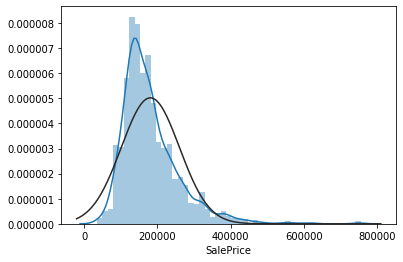

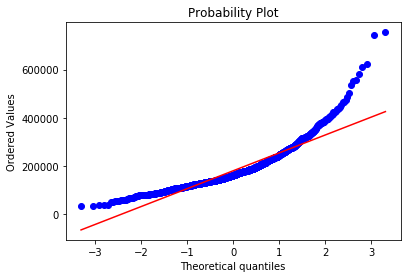

In [9]:
 #This plot first shows skewness 
 #It has normal distribution only when saleprice is log transformed
# df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)


In [36]:
'''
From the distribution saleprice is positively skewed.To solve
this we use data transformations, in this case a log transformations 
'''

'\nFrom the distribution saleprice is positively skewed.To solve\nthis we use data transformations, in this case a log transformations \n'

In [7]:
skewsale= df_train['SalePrice'].skew()
print(skewsale)

1.8828757597682129


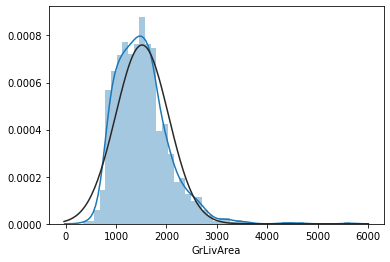

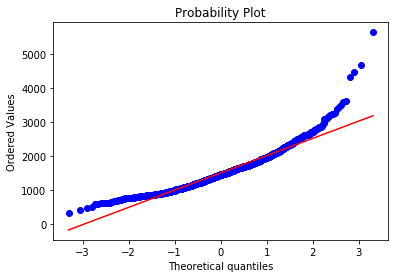

In [8]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

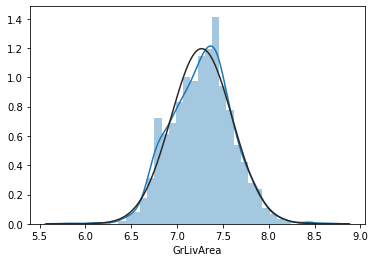

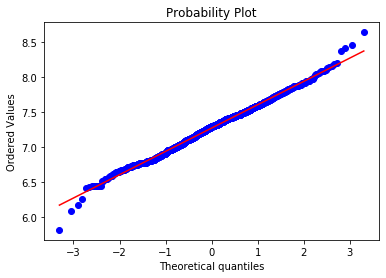

In [10]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

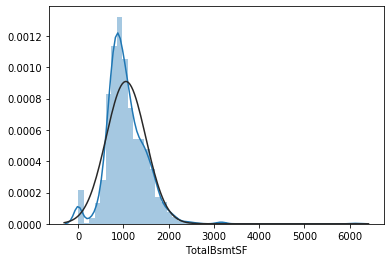

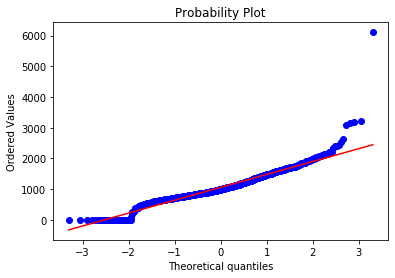

In [11]:
#trying variables with values zero values eg.TotalBsmtSF
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [10]:
'''
A log transformation cannot be performed on zero values
Therefore we need to replace these zero values with a variable
that can be equal as to not having a basement(which is TotalBsmtSF)
'''

'\nA log transformation cannot be performed on zero values\nTherefore we need to replace these zero values with a variable\nthat can be equal as to not having a basement(which is TotalBsmtSF)\n'

In [11]:
#creating column for new variable
# df_train['HasBsmt']=pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
# #if area>0 it gets 1, for area==0 it gets 0
# df_train['HasBsmt']=0
# #if bsmnt area >0 it get 1 and area==0 it gets 0
# df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
# #to transform the data
# df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])

In [ ]:
'''for a small value of alpha, regularization is too strong making the model 
   becomes biased(cannot captue complexities in the data). with a large alpha,
   the model becomes too flexible-overfit
   In this situation, best alpha is around 10
   '''